<a href="https://colab.research.google.com/github/HaydeePeruyero/CAMDA2023/blob/main/resultados/Camda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leer datos

In [4]:
import contextily as ctx
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
import plotly.express as px
import os

In [5]:
carpeta_data = "../DataSets/SelectedVariables/"
nombre_archivo = "ResistanceJoinedStrictBiofiltered.tsv.gz"

# Obtén la ruta absoluta de la carpeta actual
ruta_actual = os.getcwd()

# Construye la ruta completa al archivo CSV dentro de la carpeta "data"
#ruta_archivo = os.path.join(ruta_actual, carpeta_data, nombre_archivo)
ruta_archivo = carpeta_data + nombre_archivo

temp_data = pd.read_table(ruta_archivo, delimiter="\t", index_col=0, compression='infer')

#temp_data.shape
#ruta_archivo
temp_data

/var/folders/g8/8bbs_m397pbc6gbk4sc26t440000gn/T/ipykernel_33096/1170994391.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_data = pd.read_table(ruta_archivo, delimiter="\t", index_col=0, compression='infer')


,accession,genus,species,antibiotic,phenotype,measurement_value,3000502,3000499,3000656,3000676,...,3007751-S91I,3007751-T86I,3007751-P116A,3007751-T87I,3007751-S80I,3007751-N87I,3004562-M593T,3003294-D105E,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7768,SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7769,SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7770,SRR1257300,Salmonella,enterica,ciprofloxacin,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
tt = ['test','train']
tr_te = temp_data['phenotype'].notnull().astype(int)
aa = [tt[i] for i in tr_te]

metadata = temp_data[["genus","species","antibiotic","phenotype","measurement_value"]]
metadata['type'] = aa
metadata['gen_spec_antib'] = metadata[['genus','species','antibiotic']].agg('_'.join,axis=1)
metadata

/var/folders/g8/8bbs_m397pbc6gbk4sc26t440000gn/T/ipykernel_30383/2906322961.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = aa
/var/folders/g8/8bbs_m397pbc6gbk4sc26t440000gn/T/ipykernel_30383/2906322961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['gen_spec_antib'] = metadata[['genus','species','antibiotic']].agg('_'.join,axis=1)


,genus,species,antibiotic,phenotype,measurement_value,type,gen_spec_antib
accession,,,,,,,
GCA_002947415,Acinetobacter,baumannii,meropenem,Resistant,8.0,train,Acinetobacter_baumannii_meropenem
GCA_002947845,Acinetobacter,baumannii,meropenem,Resistant,8.0,train,Acinetobacter_baumannii_meropenem
GCA_002948925,Acinetobacter,baumannii,meropenem,Resistant,8.0,train,Acinetobacter_baumannii_meropenem
GCA_002996805,Acinetobacter,baumannii,meropenem,Resistant,8.0,train,Acinetobacter_baumannii_meropenem
GCA_003006035,Acinetobacter,baumannii,meropenem,Resistant,8.0,train,Acinetobacter_baumannii_meropenem
...,...,...,...,...,...,...,...
SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,test,Salmonella_enterica_ciprofloxacin
SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,test,Salmonella_enterica_ciprofloxacin
SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,test,Salmonella_enterica_ciprofloxacin


<Axes: xlabel='antibiotic,phenotype'>

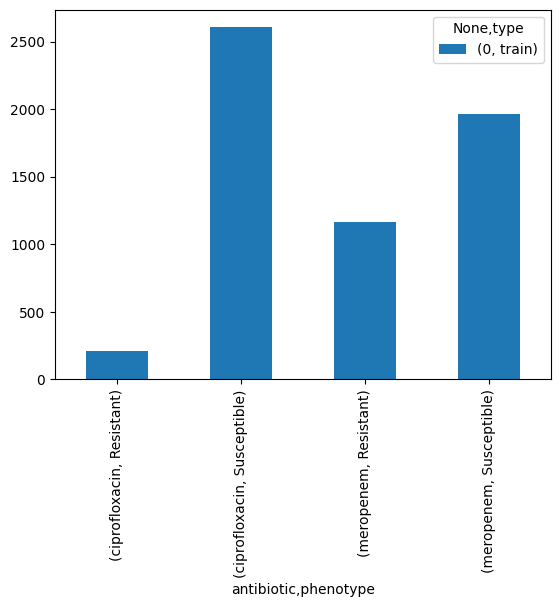

In [17]:
summary = pd.DataFrame(metadata.groupby(['antibiotic','phenotype','type']).size())
summary.unstack().plot.bar()

<Axes: xlabel='genus,species,antibiotic'>

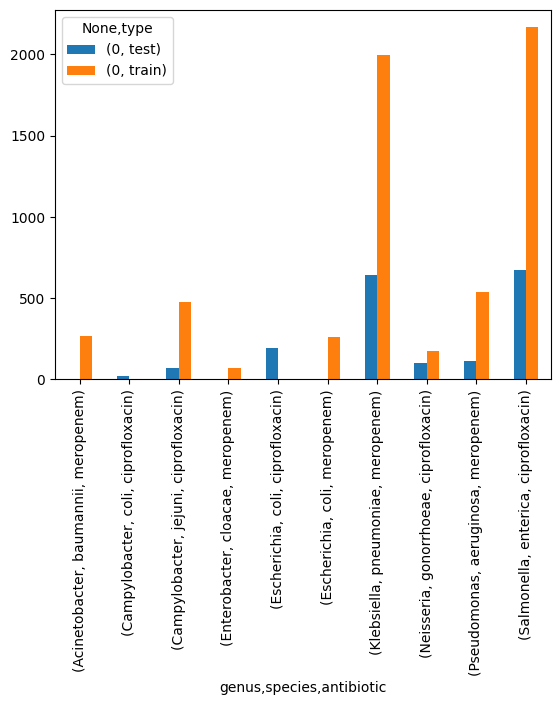

In [8]:
summary = pd.DataFrame(metadata.groupby(['genus','species','antibiotic','type']).size())
summary.unstack().plot.bar()

In [18]:
ttt = summary.unstack(2)
ttt

0
type                      train
antibiotic    phenotype        
ciprofloxacin Resistant     212
              Susceptible  2606
meropenem     Resistant    1166
              Susceptible  1968

In [10]:
list(metadata.columns)

['genus',
 'species',
 'antibiotic',
 'phenotype',
 'measurement_value',
 'type',
 'gen_spec_antib']

In [19]:
names_to_drop = ["genus","species","antibiotic","phenotype","measurement_value"]
tr_temp = temp_data[temp_data['phenotype'].notnull()]
te_temp = temp_data[temp_data['phenotype'].isnull()]
print(tr_temp.shape)
print(te_temp.shape)

(5952, 87)
(1820, 87)


In [20]:
amr_count_train = pd.DataFrame(tr_temp.drop(names_to_drop, axis=1))
amr_count_train

,3000502,3000499,3000656,3000676,3003378,3003294,3000237,3003308,3003807,3003511,...,3000815,3003189,3002791,3002724,3002719,3005112,3004636,3000024,3000025,3007402
accession,,,,,,,,,,,,,,,,,,,,,
GCA_002947415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_002947845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_002948925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_002996805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003006035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR4449966,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR4449967,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR4449972,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
amr_count_train.isnull().values.any()

False

TF-IDF para amr counts

In [22]:
from camda_functions import get_tfidf, get_factorization

tfidf_vect, tfidf = get_tfidf(amr_count_train)

In [23]:
tfidf = pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names_out(),index=amr_count_train.index)
tfidf

,3000502,3000499,3000656,3000676,3003378,3003294,3000237,3003308,3003807,3003511,...,3000815,3003189,3002791,3002724,3002719,3005112,3004636,3000024,3000025,3007402
accession,,,,,,,,,,,,,,,,,,,,,
GCA_002947415,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_002947845,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_002948925,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_002996805,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_003006035,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR4449966,0.0,0.0,0.0,0.0,0.31585,0.0,0.0,0.0,0.46868,0.457481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR4449967,0.0,0.0,0.0,0.0,0.31585,0.0,0.0,0.0,0.46868,0.457481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR4449972,0.0,0.0,0.0,0.0,0.31585,0.0,0.0,0.0,0.46868,0.457481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Clasificador en los datos filtrados de conteos de genes

In [37]:
from sklearn.preprocessing import LabelEncoder
from camda_functions import split_stratified_into_train_val_test
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.utils import class_weight

In [66]:
temp = '../Datasets/coeficientes-lasso.csv'
coef_lasso = pd.read_csv(temp)
var_lasso = coef_lasso[coef_lasso['coef']!=0]
tfidf_sel = tfidf[list(map(str,var_lasso['predictor']))]

In [38]:
y1_tr = metadata_tr['phenotype']
y2_tr = metadata_tr["measurement_value"]
# categorización de la respuesta
le = LabelEncoder()
le.fit(y1_tr)
#le.classes_
y1_tr_cat = le.transform(y1_tr)


In [67]:
X_train, y_train, __, __, X_test, y_test, class_w, __ = \
    split_stratified_into_train_val_test(tfidf_sel, y1_tr_cat, .80, 0, .20, std=False, two_subsets=True)

In [68]:
n_trees = 800
rf = RandomForestClassifier(n_estimators=n_trees, min_samples_split=3, oob_score=True, n_jobs=-1, class_weight='balanced', random_state=42)
rf.fit(X_train,y_train)
# predecir datos de validacion
y_test_hat = rf.predict(X_test)

print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       276
           1       0.93      0.82      0.87       915

    accuracy                           0.81      1191
   macro avg       0.75      0.81      0.77      1191
weighted avg       0.85      0.81      0.82      1191



Factorizaciones SVD truncado y NMF

NO EJECUTAR SI YA SE GUARDO UN MODELO!!!!

In [70]:
n_comp = 10 #cuántos componentes?
svd_fact = get_factorization(data=tfidf_sel, n_comp=n_comp, nmf=False)


In [73]:
nmf_fact = get_factorization(data=tfidf_sel, n_comp=n_comp, nmf=True)

In [74]:
amr_lsa = svd_fact.transform(tfidf_sel)
amr_nmf = nmf_fact.transform(tfidf_sel)
amr_nmf.shape

(5952, 10)

In [27]:
# guardar modelo
from camda_functions import save_pickle_model
#f_path = os.path.join(ruta_actual, carpeta_data)
f_path = ruta_actual
pkl_file = 'nmf_filter.pkl'
save_pickle_model(nmf_fact, f_path, pkl_file)
pkl_file = 'svd_filter.pkl'
save_pickle_model(svd_fact, f_path, pkl_file)


Cargar un modelo de factorizacion guardado

In [18]:
# cargar un modelo guardado
from camda_functions import save_pickle_model, load_from_pickle

f_path = ruta_actual
pkl_file = 'svd.pkl'
svd_fact = load_from_pickle(f_path, pkl_file)

amr_lsa = svd_fact.transform(tfidf)
amr_lsa.shape

(5761, 100)

In [75]:
metadata_tr = metadata[metadata['type']=='train']
metadata_tr.columns

Index(['genus', 'species', 'antibiotic', 'phenotype', 'measurement_value',
       'type', 'gen_spec_antib'],
      dtype='object')

In [80]:
lab = 'gen_spec_antib'
lab2 = 'phenotype'
embedding = amr_lsa
#embedding = amr_nmf
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': metadata_tr[lab], 'label2': metadata_tr[lab2]})
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label2', color = 'label', title='reduced plot')
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

In [32]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
clust_lab = kmeans.fit_predict(embedding)
clust_lab
#data_toy_km = pd.DataFrame(data_toy).assign(cl_km = y_km)


array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [33]:
lab = 'gen_spec_antib'
lab2 = 'phenotype'
embedding = amr_lsa
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': list(map(str,list(clust_lab))), 'label2': metadata_tr[lab]})
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label2', color = 'label', title='reduced plot')
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

/var/folders/g8/8bbs_m397pbc6gbk4sc26t440000gn/T/ipykernel_49021/2799189255.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='model'>

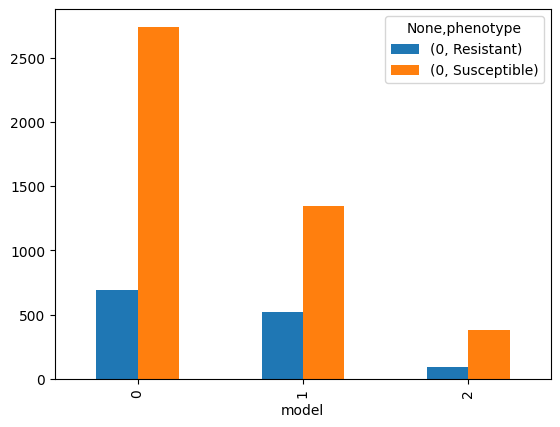

In [88]:
metadata_tr['model'] = list(map(str,list(clust_lab)))
metadata_tr['model'].astype('category')

summary = pd.DataFrame(metadata_tr.groupby(['model','phenotype']).size())
summary.unstack().plot.bar()

TF-IDF, factorizacion y clusterizacion del conjunto test

In [70]:
amr_count_test = pd.DataFrame(te_temp.drop(names_to_drop, axis=1))
tfidf_test = tfidf_vect.transform(amr_count_test).toarray()
tfidf_test = pd.DataFrame(tfidf_test,columns=tfidf_vect.get_feature_names_out(),index=amr_count_test.index)

amr_lsa_test = svd_fact.transform(tfidf_test)
amr_lsa_test.shape


(1820, 100)

In [72]:
metadata_te = metadata[metadata['type']=='test']
embedding2 = amr_lsa_test
reduced_proj2 = pd.DataFrame({'x1': embedding2[:,0], 'x2': embedding2[:,1], 'label': metadata_te[lab]})
reduced_proj2

,x1,x2,label
accession,,,
ERR1417717,0.854406,-0.208127,Escherichia_coli_ciprofloxacin
ERR1417719,0.855000,-0.207934,Escherichia_coli_ciprofloxacin
ERR1417722,0.847206,-0.202918,Escherichia_coli_ciprofloxacin
ERR1417741,0.854007,-0.197732,Escherichia_coli_ciprofloxacin
ERR1417745,0.853933,-0.203449,Escherichia_coli_ciprofloxacin
...,...,...,...
SRR3242343,0.858006,-0.214775,Salmonella_enterica_ciprofloxacin
SRR2082856,0.903027,-0.233408,Salmonella_enterica_ciprofloxacin
SRR3242362,0.908694,-0.244287,Salmonella_enterica_ciprofloxacin


In [85]:
lab = 'gen_spec_antib'
lab2 = 'phenotype'
embedding = amr_lsa
embedding2 = amr_lsa_test
metadata_te = metadata[metadata['type']=='test']
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': metadata_tr[lab], 'label2': metadata_tr[lab2]})
reduced_proj2 = pd.DataFrame({'x1': embedding2[:,0], 'x2': embedding2[:,1], 'label': metadata_te[lab]})
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label2', color = 'label', title='reduced plot')
fig.add_scatter(x=reduced_proj2['x1'], y=reduced_proj2['x2'], mode='markers', name='test')
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

In [89]:
clust_lab2 = kmeans.fit_predict(embedding2)

metadata_te['model'] = list(map(str,list(clust_lab2)))
metadata_te['model'].astype('category')
metadata_te

/var/folders/g8/8bbs_m397pbc6gbk4sc26t440000gn/T/ipykernel_49021/2304242172.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,genus,species,antibiotic,phenotype,measurement_value,type,gen_spec_antib,model
accession,,,,,,,,
ERR1417717,Escherichia,coli,ciprofloxacin,NaN,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417719,Escherichia,coli,ciprofloxacin,NaN,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417722,Escherichia,coli,ciprofloxacin,NaN,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417741,Escherichia,coli,ciprofloxacin,NaN,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417745,Escherichia,coli,ciprofloxacin,NaN,NaN,test,Escherichia_coli_ciprofloxacin,2
...,...,...,...,...,...,...,...,...
SRR3242343,Salmonella,enterica,ciprofloxacin,NaN,NaN,test,Salmonella_enterica_ciprofloxacin,2
SRR2082856,Salmonella,enterica,ciprofloxacin,NaN,NaN,test,Salmonella_enterica_ciprofloxacin,2
SRR3242362,Salmonella,enterica,ciprofloxacin,NaN,NaN,test,Salmonella_enterica_ciprofloxacin,2


Entrenar los k modelos de clasificación

Random forests para todos los clusters (modelos en metadata)

In [101]:
from sklearn.preprocessing import LabelEncoder
from camda_functions import split_stratified_into_train_val_test
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.utils import class_weight



In [81]:
y1_tr = metadata_tr['phenotype']
y2_tr = metadata_tr["measurement_value"]
# categorización de la respuesta
le = LabelEncoder()
le.fit(y1_tr)
#le.classes_
y1_tr_cat = le.transform(y1_tr)


In [82]:
X_train, y_train, __, __, X_test, y_test, class_w, __ = \
    split_stratified_into_train_val_test(amr_lsa, y1_tr_cat, .80, 0, .20, std=False, two_subsets=True)

In [83]:
n_trees = 800
rf = RandomForestClassifier(n_estimators=n_trees, min_samples_split=3, oob_score=True, n_jobs=-1, class_weight='balanced', random_state=42)
rf.fit(X_train,y_train)
# predecir datos de validacion
y_test_hat = rf.predict(X_test)

print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       276
           1       0.92      0.87      0.89       915

    accuracy                           0.84      1191
   macro avg       0.78      0.81      0.79      1191
weighted avg       0.86      0.84      0.85      1191



RF para cada modelo

In [196]:
x_temp = amr_lsa[metadata_tr['model']=='0']
y_cat_tr0 = y1_tr_cat[metadata_tr['model']=='0']
X_train0, y_train0, __, __, X_test0, y_test0, class_w0, __ = split_stratified_into_train_val_test(x_temp, y_cat_tr0, .80, 0, .20, std=False, two_subsets=True,random_state=42)
classes_weights0 = class_weight.compute_sample_weight(class_weight='balanced', y=y_train0)

x_temp = amr_lsa[metadata_tr['model']=='1']
y_cat_tr1 = y1_tr_cat[metadata_tr['model']=='1']
X_train1, y_train1, __, __, X_test1, y_test1, class_w1, __ = split_stratified_into_train_val_test(x_temp, y_cat_tr1, .80, 0, .20, std=False, two_subsets=True,random_state=42)
classes_weights1 = class_weight.compute_sample_weight(class_weight='balanced', y=y_train1)

x_temp = amr_lsa[metadata_tr['model']=='2']
y_cat_tr2 = y1_tr_cat[metadata_tr['model']=='2']
X_train2, y_train2, __, __, X_test2, y_test2, class_w2, __ = split_stratified_into_train_val_test(x_temp, y_cat_tr2, .80, 0, .20, std=False, two_subsets=True,random_state=42)
classes_weights2 = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       138
           1       0.94      0.98      0.96       548

    accuracy                           0.94       686
   macro avg       0.93      0.87      0.90       686
weighted avg       0.94      0.94      0.94       686



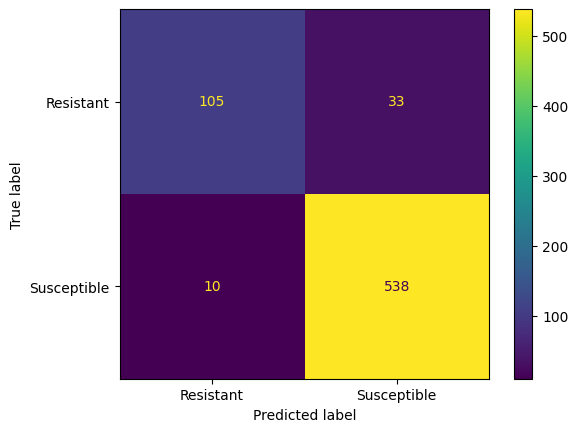

In [197]:
n_trees = 1500
rf_mod = RandomForestClassifier(n_estimators=n_trees, min_samples_split=2, oob_score=True, n_jobs=-1, class_weight='balanced', random_state=42)
rf0 = rf_mod.fit(X_train0,y_train0)
# predecir datos de validacion
y_test_hat0 = rf0.predict(X_test0)

print(metrics.classification_report(y_test0, y_test_hat0))
cm = metrics.confusion_matrix(y_test0, y_test_hat0)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(rf0.classes_))
disp.plot()

              precision    recall  f1-score   support

           0       0.89      0.63      0.74       104
           1       0.87      0.97      0.92       269

    accuracy                           0.88       373
   macro avg       0.88      0.80      0.83       373
weighted avg       0.88      0.88      0.87       373



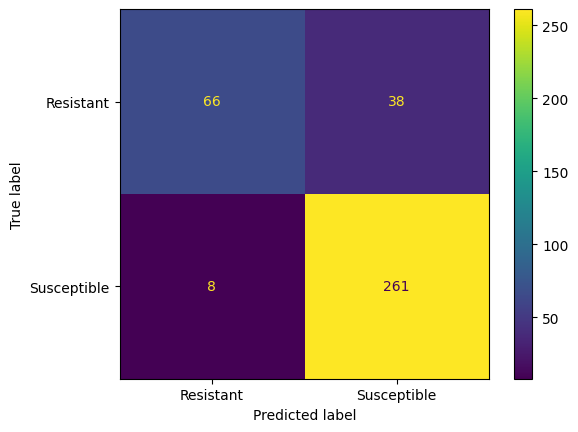

In [159]:
rf1 = rf_mod.fit(X_train1,y_train1)
# predecir datos de validacion
y_test_hat1 = rf1.predict(X_test1)

print(metrics.classification_report(y_test1, y_test_hat1))
cm = metrics.confusion_matrix(y_test1, y_test_hat1)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(rf_mod.classes_))
disp.plot()

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        18
           1       0.84      1.00      0.91        76

    accuracy                           0.84        94
   macro avg       0.92      0.58      0.60        94
weighted avg       0.87      0.84      0.79        94



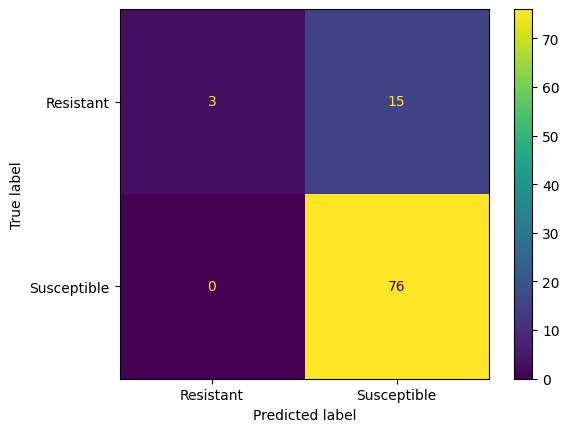

In [160]:
rf2 = rf_mod.fit(X_train2,y_train2)
# predecir datos de validacion
y_test_hat2 = rf2.predict(X_test2)

print(metrics.classification_report(y_test2, y_test_hat2))
cm = metrics.confusion_matrix(y_test2, y_test_hat2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(rf_mod.classes_))
disp.plot()

              precision    recall  f1-score   support

           0       0.89      0.67      0.76       260
           1       0.91      0.98      0.94       893

    accuracy                           0.91      1153
   macro avg       0.90      0.82      0.85      1153
weighted avg       0.91      0.91      0.90      1153



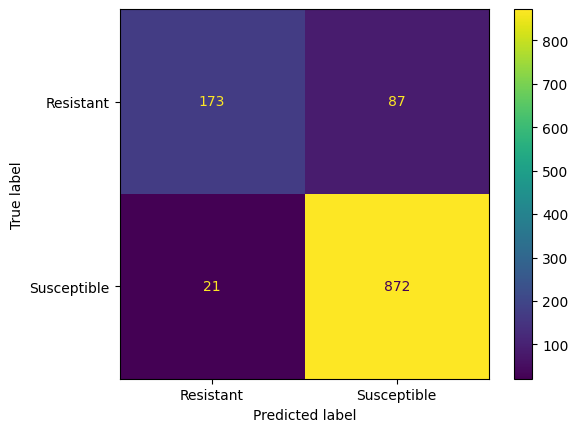

In [161]:
y_test_predicted = np.concatenate([y_test_hat0,y_test_hat1,y_test_hat2])
y_test_all = np.concatenate([y_test0,y_test1,y_test2])

print(metrics.classification_report(y_test_all, y_test_predicted))
cm = metrics.confusion_matrix(y_test_all, y_test_predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(rf_mod.classes_))
disp.plot()

XGBoost

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

parameters = {
    'max_depth': [2, 5,10, 20],
    'n_estimators': [100,200,500,1000],
    'eta': [0.5, 0.3, 0.1]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective="binary:logistic", seed=42, verbosity=1),
    param_grid=parameters,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = kfold,
    verbose=True
)


In [85]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

grid_search.fit(X_train, y_train, sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.5, 0.3, 0.1], 'max_depth': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='f1_macro', verbose=True)

In [86]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.773638 using {'eta': 0.5, 'max_depth': 5, 'n_estimators': 1000}


              precision    recall  f1-score   support

           0       0.63      0.77      0.69       276
           1       0.93      0.86      0.89       915

    accuracy                           0.84      1191
   macro avg       0.78      0.82      0.79      1191
weighted avg       0.86      0.84      0.85      1191



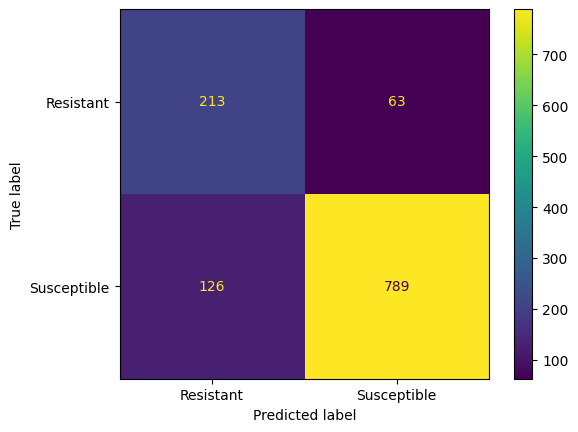

In [87]:
xgb_best = grid_search.best_estimator_
xgb_best.fit(X_train, y_train, sample_weight=classes_weights)
y_test_hat = xgb_best.predict(X_test)
print(metrics.classification_report(y_test, y_test_hat))

cm = metrics.confusion_matrix(y_test, y_test_hat)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(xgb_best.classes_))
disp.plot()

para cada modelo

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       138
           1       0.95      0.97      0.96       548

    accuracy                           0.94       686
   macro avg       0.91      0.89      0.90       686
weighted avg       0.94      0.94      0.94       686



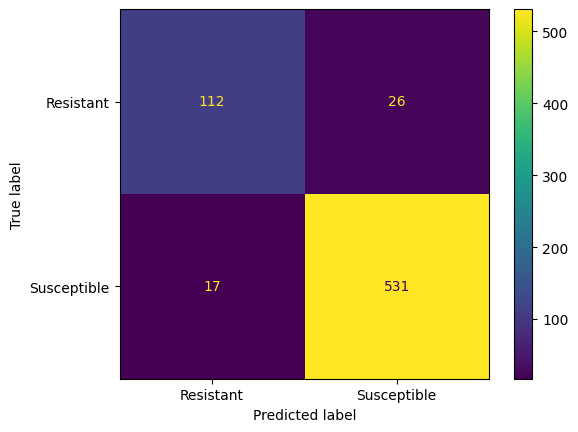

In [202]:
grid_search.fit(X_train0, y_train0, sample_weight=classes_weights0)
xgb_best0 = grid_search.best_estimator_
xgb_best0.fit(X_train0, y_train0, sample_weight=classes_weights0)
y_test_hat0 = xgb_best0.predict(X_test0)

print(metrics.classification_report(y_test0, y_test_hat0))
cm = metrics.confusion_matrix(y_test0, y_test_hat0)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(xgb_best0.classes_))
disp.plot()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       104
           1       0.91      0.94      0.92       269

    accuracy                           0.88       373
   macro avg       0.86      0.84      0.85       373
weighted avg       0.88      0.88      0.88       373



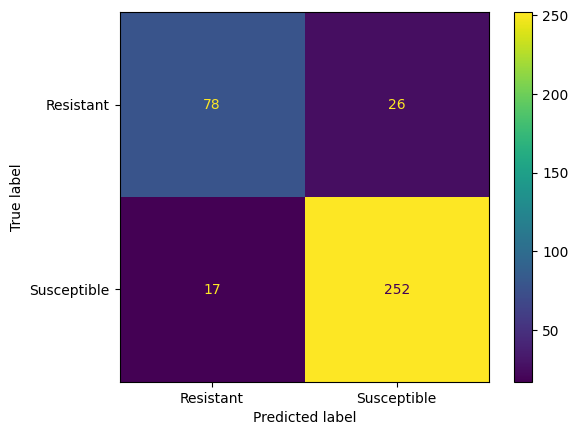

In [204]:
grid_search.fit(X_train1, y_train1, sample_weight=classes_weights1)
xgb_best1 = grid_search.best_estimator_
xgb_best1.fit(X_train1, y_train1, sample_weight=classes_weights1)
y_test_hat1 = xgb_best1.predict(X_test1)

print(metrics.classification_report(y_test1, y_test_hat1))
cm = metrics.confusion_matrix(y_test1, y_test_hat1)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(xgb_best1.classes_))
disp.plot()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.88      0.93      0.90        76

    accuracy                           0.84        94
   macro avg       0.75      0.69      0.71        94
weighted avg       0.83      0.84      0.83        94



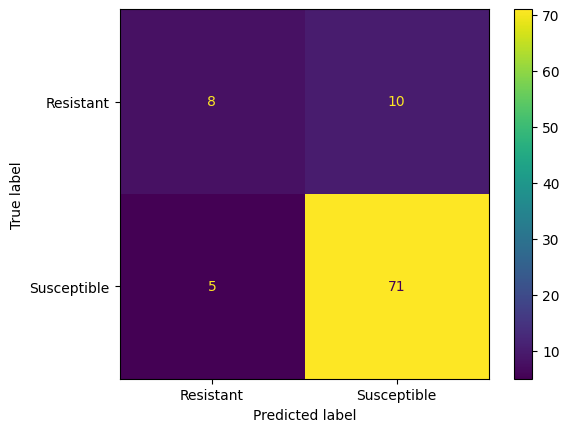

In [205]:
grid_search.fit(X_train2, y_train2, sample_weight=classes_weights2)
xgb_best2 = grid_search.best_estimator_
xgb_best2.fit(X_train2, y_train2, sample_weight=classes_weights2)
y_test_hat2 = xgb_best2.predict(X_test2)

print(metrics.classification_report(y_test2, y_test_hat2))
cm = metrics.confusion_matrix(y_test2, y_test_hat2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(xgb_best2.classes_))
disp.plot()

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       260
           1       0.93      0.96      0.94       893

    accuracy                           0.91      1153
   macro avg       0.88      0.86      0.87      1153
weighted avg       0.91      0.91      0.91      1153



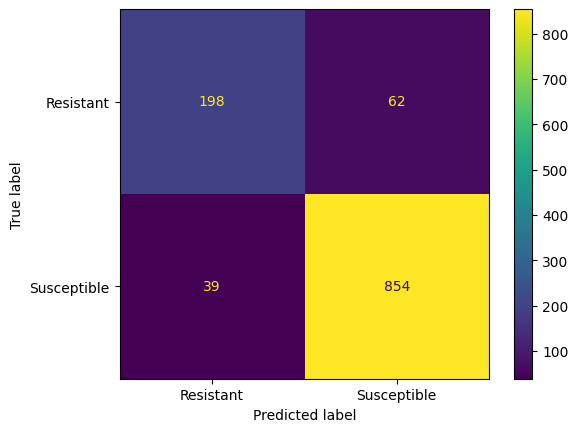

In [206]:
y_test_predicted = np.concatenate([y_test_hat0,y_test_hat1,y_test_hat2])
y_test_all = np.concatenate([y_test0,y_test1,y_test2])

print(metrics.classification_report(y_test_all, y_test_predicted))
cm = metrics.confusion_matrix(y_test_all, y_test_predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(rf_mod.classes_))
disp.plot()

para cada modelo

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       138
           1       0.95      0.97      0.96       548

    accuracy                           0.94       686
   macro avg       0.91      0.89      0.90       686
weighted avg       0.93      0.94      0.94       686



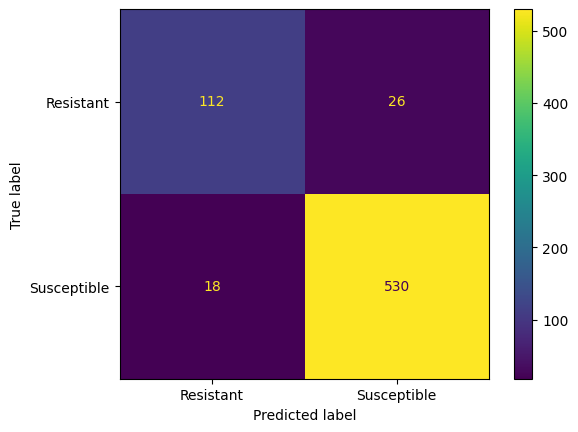

In [207]:
xgb_best0 = xgb_best.fit(X_train0, y_train0, sample_weight=classes_weights0)
y_test_hat0 = xgb_best0.predict(X_test0)

print(metrics.classification_report(y_test0, y_test_hat0))
cm = metrics.confusion_matrix(y_test0, y_test_hat0)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(xgb_best0.classes_))
disp.plot()

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       104
           1       0.91      0.94      0.93       269

    accuracy                           0.89       373
   macro avg       0.87      0.85      0.86       373
weighted avg       0.89      0.89      0.89       373



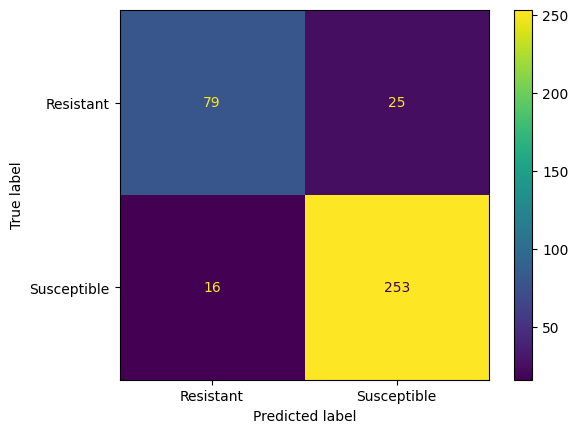

In [208]:
xgb_best1 = xgb_best.fit(X_train1, y_train1, sample_weight=classes_weights1)
y_test_hat1 = xgb_best1.predict(X_test1)

print(metrics.classification_report(y_test1, y_test_hat1))
cm = metrics.confusion_matrix(y_test1, y_test_hat1)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(xgb_best1.classes_))
disp.plot()

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.90      0.95      0.92        76

    accuracy                           0.87        94
   macro avg       0.81      0.75      0.77        94
weighted avg       0.86      0.87      0.87        94



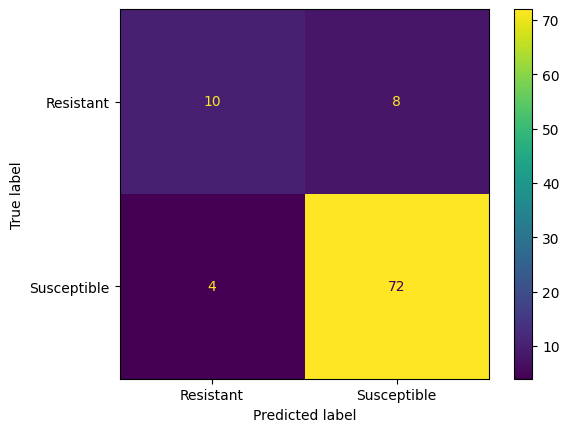

In [209]:
xgb_best2 = xgb_best.fit(X_train2, y_train2, sample_weight=classes_weights2)
y_test_hat2 = xgb_best2.predict(X_test2)

print(metrics.classification_report(y_test2, y_test_hat2))
cm = metrics.confusion_matrix(y_test2, y_test_hat2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(xgb_best2.classes_))
disp.plot()

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       260
           1       0.94      0.96      0.95       893

    accuracy                           0.92      1153
   macro avg       0.89      0.87      0.88      1153
weighted avg       0.91      0.92      0.91      1153



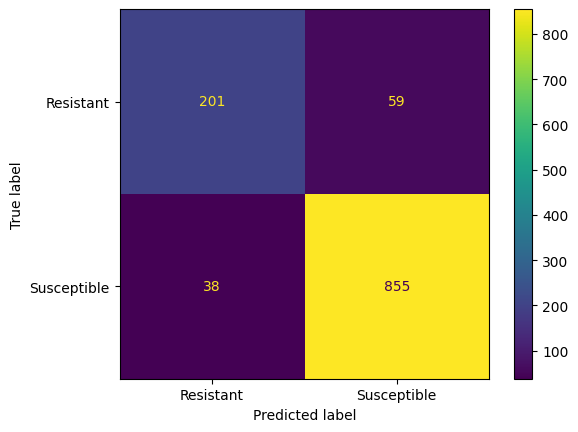

In [210]:
y_test_predicted = np.concatenate([y_test_hat0,y_test_hat1,y_test_hat2])
y_test_all = np.concatenate([y_test0,y_test1,y_test2])

print(metrics.classification_report(y_test_all, y_test_predicted))
cm = metrics.confusion_matrix(y_test_all, y_test_predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(rf_mod.classes_))
disp.plot()

Predecir los datos de test de camda con el mejor xgboost

In [211]:
X_test_camda0 = amr_lsa_test[metadata_te['model']=='0']
X_test_camda1 = amr_lsa_test[metadata_te['model']=='1']
X_test_camda2 = amr_lsa_test[metadata_te['model']=='2']

y_test_camda0 = xgb_best0.predict(X_test_camda0)
y_test_camda1 = xgb_best1.predict(X_test_camda1)
y_test_camda2 = xgb_best2.predict(X_test_camda2)

In [230]:
metadata_test_predict_camda = metadata_te
metadata_test_predict_camda.loc[metadata_te['model']=='0','phenotype']= le.inverse_transform(y_test_camda0)
metadata_test_predict_camda.loc[metadata_te['model']=='1','phenotype']= le.inverse_transform(y_test_camda1)
metadata_test_predict_camda.loc[metadata_te['model']=='2','phenotype']= le.inverse_transform(y_test_camda2)

metadata_test_predict_camda

,genus,species,antibiotic,phenotype,measurement_value,type,gen_spec_antib,model
accession,,,,,,,,
ERR1417717,Escherichia,coli,ciprofloxacin,Susceptible,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417719,Escherichia,coli,ciprofloxacin,Susceptible,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417722,Escherichia,coli,ciprofloxacin,Susceptible,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417741,Escherichia,coli,ciprofloxacin,Susceptible,NaN,test,Escherichia_coli_ciprofloxacin,2
ERR1417745,Escherichia,coli,ciprofloxacin,Susceptible,NaN,test,Escherichia_coli_ciprofloxacin,2
...,...,...,...,...,...,...,...,...
SRR3242343,Salmonella,enterica,ciprofloxacin,Susceptible,NaN,test,Salmonella_enterica_ciprofloxacin,2
SRR2082856,Salmonella,enterica,ciprofloxacin,Susceptible,NaN,test,Salmonella_enterica_ciprofloxacin,2
SRR3242362,Salmonella,enterica,ciprofloxacin,Susceptible,NaN,test,Salmonella_enterica_ciprofloxacin,2


In [336]:
ss

,0
phenotype,
Resistant,36
Susceptible,1784


<Axes: xlabel='None,phenotype'>

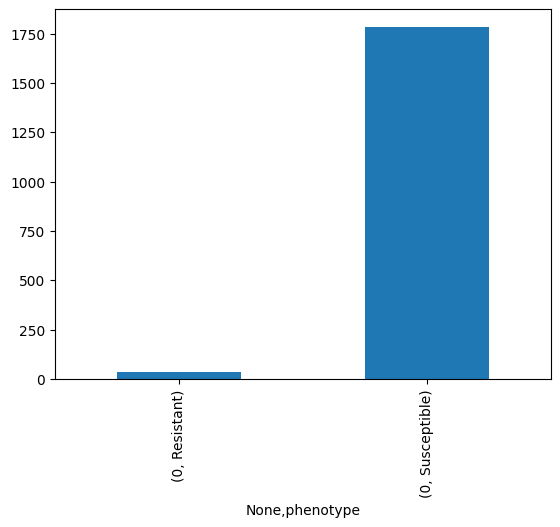

In [335]:
ss = pd.DataFrame(metadata_test_predict_camda.groupby(['phenotype']).size())
ss.unstack().plot.bar()

In [314]:
all_predictions = pd.read_csv('../predicciones.csv', index_col=2)
all_predictions = all_predictions.join(metadata_test_predict_camda['phenotype'], how = 'inner')
all_predictions.to_csv('../predicciones_actual.csv')
all_predictions

,genus,species,antibiotic,status,Sin_transformacion_MLP,Con tfidf MLP,PCA-svm pol,pca + tfidf,svd MLP,svd+tfidf RF1200,umap KNN5,umap+tfidf KNN5,lasso,phenotype
accession,,,,,,,,,,,,,,
ERR1417717,Escherichia,coli,ciprofloxacin,EscS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible
ERR1417719,Escherichia,coli,ciprofloxacin,EscS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible
ERR1417722,Escherichia,coli,ciprofloxacin,EscS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible
ERR1417741,Escherichia,coli,ciprofloxacin,EscS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible
ERR1417745,Escherichia,coli,ciprofloxacin,EscS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3242343,Salmonella,enterica,ciprofloxacin,SaeS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible
SRR2082856,Salmonella,enterica,ciprofloxacin,SaeS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible
SRR3242362,Salmonella,enterica,ciprofloxacin,SaeS,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible,Susceptible


In [333]:
aa = all_predictions['status']
aa.iloc[0][-1]

'S'

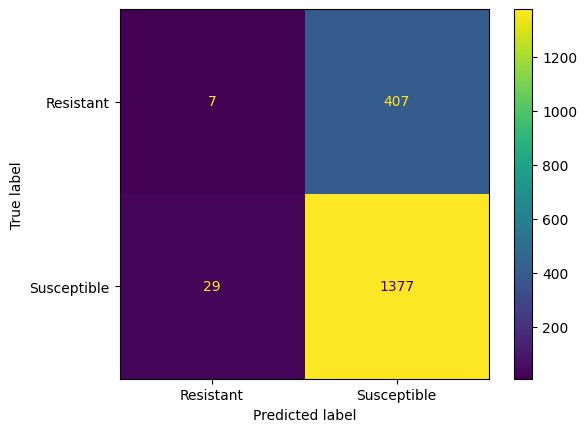

In [318]:
#pd.crosstab(all_predictions['lasso'],all_predictions['phenotype'])
cm = metrics.confusion_matrix(all_predictions['lasso'], all_predictions['phenotype'])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.inverse_transform(rf_mod.classes_))
disp.plot()

In [280]:

list(ss.columns)

['Sin_transformacion_MLP',
 'Con tfidf MLP',
 'PCA-svm pol',
 'pca + tfidf ',
 'svd MLP',
 'svd+tfidf RF1200',
 'umap KNN5',
 'umap+tfidf KNN5',
 'lasso',
 'phenotype']

<Axes: xlabel='umap KNN5'>

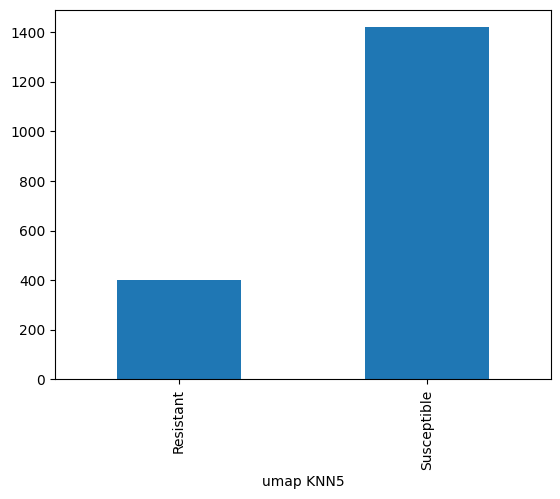

In [324]:
ss = all_predictions[['umap KNN5']]
ss = all_predictions.groupby(list(ss.columns)).size()
ss.plot.bar()


In [265]:
ss = all_predictions[['Sin_transformacion_MLP','Con tfidf MLP', 'PCA-svm pol', 'pca + tfidf ', 'svd MLP', 'svd+tfidf RF1200', 'umap KNN5', 'umap+tfidf KNN5', 'lasso','phenotype']]
ss.plot.bar()

TypeError: no numeric data to plot

Pruebas con UMAP

In [50]:
import umap.umap_ as umap
import plotly.express as px

reducer = umap.UMAP(n_neighbors=25, n_components=3, min_dist=.8, metric='cosine')
#embedding = reducer.fit_transform(amr_nmf)
embedding = reducer.fit_transform(tfidf)

In [ ]:
["genus","species","antibiotic","phenotype","measurement_value"]


In [66]:
lab = 'genus'
umap_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': temp_data[lab], 'label2': temp_data['phenotype']})

fig = px.scatter(umap_proj, x='x1', y='x2', hover_data='label2', color = 'label', title='UMAP plot')
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

In [18]:
from camda_functions import save_pickle_model, load_from_pickle

In [20]:
# guardar modelo

pkl_file = 'svd.pkl'
f_path = os.path.join(ruta_actual, carpeta_data)
save_pickle_model(fact_obj, f_path, pkl_file)

In [22]:
# cargar modelo

ff = load_from_pickle(f_path, pkl_file)

aa = ff.transform(tfidf)
aa.shape

(365, 150)